# Final Project

### Simon Mauquoi

### Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
print(sklearn.__version__)

1.0.2


In [2]:
speeches = pd.read_csv("presidential_speeches.csv")

In [3]:
speeches.sample(10)

,Date,President,Party,Speech Title,Summary,Transcript,URL
220,1861-03-04,Abraham Lincoln,Republican,First Inaugural Address,President Lincoln uses his first inaugural add...,Fellow citizens of the United States: In compl...,https://millercenter.org/the-presidency/presid...
485,1929-03-04,Herbert Hoover,Republican,Inaugural Address,NaN,My Countrymen: This occasion is not alone the ...,https://millercenter.org/the-presidency/presid...
178,1850-04-22,Zachary Taylor,Whig,Message Regarding Treaty with Great Britain,NaN,To the Senate of the United States: I herewith...,https://millercenter.org/the-presidency/presid...
608,1961-07-25,John F. Kennedy,Democratic,Report on the Berlin Crisis,NaN,Good evening: Seven weeks ago tonight I return...,https://millercenter.org/the-presidency/presid...
714,1972-01-25,Richard M. Nixon,Republican,Address to the Nation on Plan for Peace in Vie...,President Nixon announces a public plan to end...,Good evening: I have asked for this television...,https://millercenter.org/the-presidency/presid...
540,1941-03-15,Franklin D. Roosevelt,Democratic,On Lend Lease,The President stresses the urgency of respondi...,This dinner of the White House Correspondents ...,https://millercenter.org/the-presidency/presid...
834,1991-01-16,George H. W. Bush,Republican,Address to the Nation on the Invasion of Iraq,Bush explains that the aerial invasion of Iraq...,"Just 2 hours ago, allied air forces began an a...",https://millercenter.org/the-presidency/presid...
250,1867-07-19,Andrew Johnson,Democratic,Message Regarding Reconstruction Legislation,NaN,To the House of Representatives of the United ...,https://millercenter.org/the-presidency/presid...
677,1966-02-23,Lyndon B. Johnson,Democratic,Remarks on Receiving the National Freedom Award,President Johnson presents a speech upon recei...,"Mr. Chief Justice, Mr. Secretary, Senator Kenn...",https://millercenter.org/the-presidency/presid...
232,1865-05-02,Andrew Johnson,Democratic,Establishing Rewards for the Arrest of Certain...,NaN,Whereas it appears from evidence in the Bureau...,https://millercenter.org/the-presidency/presid...


In [4]:
speeches.columns = ['Date', 'President', 'Party', 'Title', 'Summary', 'Transcript', 'URL']
speeches.head()

,Date,President,Party,Title,Summary,Transcript,URL
0,1789-04-30,George Washington,Unaffiliated,First Inaugural Address,Washington calls on Congress to avoid local an...,Fellow Citizens of the Senate and the House of...,https://millercenter.org/the-presidency/presid...
1,1789-10-03,George Washington,Unaffiliated,Thanksgiving Proclamation,"At the request of Congress, Washington establi...",Whereas it is the duty of all Nations to ackno...,https://millercenter.org/the-presidency/presid...
2,1790-01-08,George Washington,Unaffiliated,First Annual Message to Congress,"In a wide ranging speech, President Washington...",Fellow Citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
3,1790-12-08,George Washington,Unaffiliated,Second Annual Message to Congress,Washington focuses on commerce in his second a...,Fellow citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
4,1790-12-29,George Washington,Unaffiliated,Talk to the Chiefs and Counselors of the Senec...,The President reassures the Seneca Nation that...,"I the President of the United States, by my ow...",https://millercenter.org/the-presidency/presid...


In [5]:
speeches.shape

(992, 7)

In [6]:
speeches.isnull().sum()

Date            0
President       0
Party           0
Title           0
Summary       305
Transcript      1
URL             0
dtype: int64

- Almost a third of the summaries is missing, it makes sense to drop this column since too much data is missing. The last column with the URL's is also not very useful so that will be left out too. The one missing data point in Transcript is also not useful and is best to be dropped.

In [7]:
speeches.dropna(subset=['Transcript'], inplace=True)
speeches.drop(columns=['Summary', 'URL'], inplace=True)
speeches.shape

(991, 5)

In [8]:
speeches.isnull().sum()

Date          0
President     0
Party         0
Title         0
Transcript    0
dtype: int64

In [9]:
speeches.head()

,Date,President,Party,Title,Transcript
0,1789-04-30,George Washington,Unaffiliated,First Inaugural Address,Fellow Citizens of the Senate and the House of...
1,1789-10-03,George Washington,Unaffiliated,Thanksgiving Proclamation,Whereas it is the duty of all Nations to ackno...
2,1790-01-08,George Washington,Unaffiliated,First Annual Message to Congress,Fellow Citizens of the Senate and House of Rep...
3,1790-12-08,George Washington,Unaffiliated,Second Annual Message to Congress,Fellow citizens of the Senate and House of Rep...
4,1790-12-29,George Washington,Unaffiliated,Talk to the Chiefs and Counselors of the Senec...,"I the President of the United States, by my ow..."


In [10]:
speeches.Party.value_counts()

Democratic               478
Republican               389
Democratic-Republican     64
Unaffiliated              39
Whig                      12
Federalist                 9
Name: Party, dtype: int64

- Binary classification only involves either Democratic or Republican, the other values in the Party column are not useful in this regard and have to be extracted. Afterwards both values should be changed into binary values.

In [11]:
cleaned = ['Democratic', 'Republican']

In [12]:
cleaned_speeches = speeches[speeches.Party.isin(cleaned)]
cleaned_speeches.sample(10)

,Date,President,Party,Title,Transcript
932,2009-12-01,Barack Obama,Democratic,Speech on Strategy in Afghanistan and Pakistan,Good evening. To the United States Corps of Ca...
584,1953-04-16,Dwight D. Eisenhower,Republican,Chance for Peace,In this spring of 1953 the free world weighs o...
671,1965-07-13,Lyndon B. Johnson,Democratic,Press Conference in the East Room,"THE PRESIDENT. Good afternoon, ladies and gent..."
798,1984-10-07,Ronald Reagan,Republican,Debate with Walter Mondale (Domestic Issues),"Ms. Ridings. be: ( 1 Dorothy Ridings, presiden..."
353,1893-02-15,Benjamin Harrison,Republican,Message Regarding Hawaiian Annexation,"To the Senate: I transmit herewith, with a vie..."
536,1940-07-19,Franklin D. Roosevelt,Democratic,Democratic National Convention,Members of the Vietnam and friends: It is very...
103,1832-02-15,Andrew Jackson,Democratic,Message Regarding Indian Removal,To the Senate and House of Representatives: Be...
622,1962-10-22,John F. Kennedy,Democratic,Address on the Buildup of Arms in Cuba,"Good evening, my fellow citizens: This Governm..."
372,1897-03-02,Grover Cleveland,Democratic,Veto Message Regarding Immigration Legislation,To the House of Representatives: I herewith re...
187,1853-03-04,Franklin Pierce,Democratic,Inaugural Address,My Countrymen: It a relief to feel that no hea...


In [13]:
cleaned_speeches.shape

(867, 5)

In [14]:
cleaned_speeches.Party.replace({'Democratic': 0, 'Republican': 1}, inplace=True)

C:\Users\mauqu\AppData\Local\Temp\ipykernel_64492\2221389870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_speeches.Party.replace({'Democratic': 0, 'Republican': 1}, inplace=True)


In [15]:
cleaned_speeches.sample(10)

,Date,President,Party,Title,Transcript
630,1963-07-26,John F. Kennedy,0,Address on the Nuclear Test Ban Treaty,"Good evening, my fellow citizens: I speak to y..."
324,1886-05-08,Grover Cleveland,0,Veto of Military Pension Legislation,To the House of Representatives: I return with...
626,1963-06-05,John F. Kennedy,0,Remarks at U.S. Air Force Academy,"General, Secretary Zuckert, General LeMay, Mem..."
501,1931-02-03,Herbert Hoover,1,Statement on Unemployment Relief,THE PRESIDENT said: Certain Senators have issu...
924,2009-01-15,George W. Bush,1,Farewell Address to the Nation,"Fellow citizens: For eight years, it has been ..."
893,2002-06-01,George W. Bush,1,Graduation Speech at West Point,"Thank you very much, General Lennox. Mr. Secre..."
772,1981-08-03,Ronald Reagan,1,Remarks on the Air Traffic Controllers Strike,The President. This morning at 7 l933 the unio...
827,1989-12-20,George H. W. Bush,1,Address to the Nation on Panama,"My fellow citizens, last night I ordered in 18..."
271,1870-08-22,Ulysses S. Grant,1,Proclamation Establishing US Neutrality,By the President of the United States of Ameri...
604,1961-05-17,John F. Kennedy,0,Address before the Canadian Parliament,"Mr. Speaker of the Senate, Mr. Speaker of the ..."


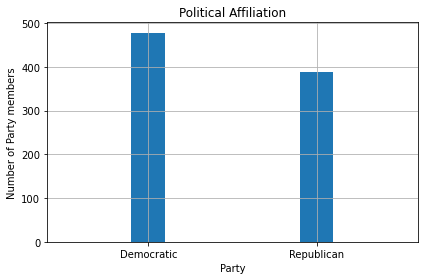

In [16]:
cleaned_speeches[['Party']].hist(range=[-0.5, 1.5]);
x = [0, 1]
labels = ['Democratic', 'Republican']
plt.title('Political Affiliation')
plt.ylabel('Number of Party members')
plt.xlabel('Party')
plt.xticks(x, labels)
plt.tight_layout()
plt.show()

In [17]:
cleaned_speeches.to_csv("C:/Users/mauqu/Desktop/cleaned_speeches.csv", index=False)